<h2 style="text-align: center;"><strong>Realización del ETL Proyecto Engagement - FERIVA</strong></h2>

<div style="height: 6px; display: flex; margin-bottom: 12px;">
  <div style="flex: 1; background-color: orange;"></div>
  <div style="flex: 1; background-color: violet;"></div>
  <div style="flex: 1; background-color: #006666;"></div>
</div>





##  1.  Carga y exploración inicial
<hr style="border: none; height: 5px; background-color: Orange;">

### Carga de **Social Media Engagement** Dataset  y comprobación de registros 

In [14]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv( r'C:\Users\Bruger\Desktop\Proyecto Redes\Dataset REDES\Social Media Engagement Dataset.csv')


In [15]:
# 4. Comprobacion de la cantidad de registros y columnas especificadas. 
print("Comprobacion del data set") 
print(df.shape)

# Vista previa
print(df.head())

# Verificar valores nulos
print(df.isnull().sum())

# Tipos de datos
print(df.dtypes)

Comprobacion del data set
(12000, 28)
        post_id            timestamp day_of_week   platform        user_id  \
0  kcqbs6hxybia  2024-12-09 11:26:15      Monday  Instagram  user_52nwb0a6   
1  vkmervg4ioos  2024-07-28 19:59:26      Sunday    Twitter  user_ucryct98   
2  memhx4o1x6yu  2024-11-23 14:00:12    Saturday     Reddit  user_7rrev126   
3  bhyo6piijqt9  2024-09-16 04:35:25      Monday    YouTube  user_4mxuq0ax   
4  c9dkiomowakt  2024-09-05 21:03:01    Thursday    Twitter  user_l1vpox2k   

               location language  \
0  Melbourne, Australia       pt   
1          Tokyo, Japan       ru   
2        Beijing, China       ru   
3        Lagos, Nigeria       en   
4       Berlin, Germany       hi   

                                        text_content  \
0  Just tried the Chromebook from Google. Best pu...   
1  Just saw an ad for Microsoft Surface Laptop du...   
2  What's your opinion about Nike's Epic React?  ...   
3  Bummed out with my new Diet Pepsi from Pepsi! ...

### Verificación de valores nulos, ajuste de tipos de datos y estandarizacion de nombres.



In [16]:
#Reemplazo nulos por Vacios 
df['mentions'] = df['mentions'].fillna("")

# Cambio de formato  a fecha  
df['timestamp'] = pd.to_datetime(df['timestamp'])

#Estandarizo nombres que contiene mayus y minuscula solo mayuscula al comienzo
df['platform'] = df['platform'].str.capitalize()


## Limpieza y transformaciones
<hr style="border: none; height: 5px; background-color: Orange;">


### Mapeo de abreviaturas y separación de columnas 

In [17]:
# Mapeo de abreviaturas estándar en mayúsculas
language_map = {
    'pt': 'POR',
    'ru': 'RUS',
    'en': 'ENG',
    'hi': 'HIN',
    'ja': 'JPN',
    'es': 'ESP',
    'de': 'GER',
    'fr': 'FRA',
    'ar': 'ARAB',
    'zh': 'CHI'
}

# Aplicar el mapeo a la columna 'language'
df['language'] = df['language'].map(language_map)


In [18]:
# Separar la columna 'location' por la coma
df[['city', 'country']] = df['location'].str.split(',', n=1, expand=True)

# Eliminar espacios extra (si los hay)
df['city'] = df['city'].str.strip()
df['country'] = df['country'].str.strip()

# Verificar resultado
print(df[['location', 'city', 'country']].head())

               location       city    country
0  Melbourne, Australia  Melbourne  Australia
1          Tokyo, Japan      Tokyo      Japan
2        Beijing, China    Beijing      China
3        Lagos, Nigeria      Lagos    Nigeria
4       Berlin, Germany     Berlin    Germany


In [19]:
print(df.columns)


Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate',
       'city', 'country'],
      dtype='object')


## Verificación de integridad

<hr style="border: none; height: 5px; background-color: violet;">

### Eliminación de filas duplicadas, conversión de contenido y revisión de valores negativo inadecuados

In [20]:
# Eliminar filas duplicadas para evitar registros repetidos
# Esto es útil si hubo cargas múltiples o errores en la fuente de datos
df.drop_duplicates(inplace=True)


In [21]:
print(df.shape)

(12000, 30)


In [22]:
# Convertir contenido de texto a minúsculas para evitar errores al filtrar o agrupar
#  útil al hacer análisis de hashtags o contenido
df['hashtags'] = df['hashtags'].str.lower()


In [23]:
# Verificar si hay valores negativos en columnas (no deberían existir)

print(df[df['engagement_rate'] < 0])

print(df[df['shares_count'] < 0])

print(df[df['comments_count'] < 0])

print(df[df['impressions'] < 0])






Empty DataFrame
Columns: [post_id, timestamp, day_of_week, platform, user_id, location, language, text_content, hashtags, mentions, keywords, topic_category, sentiment_score, sentiment_label, emotion_type, toxicity_score, likes_count, shares_count, comments_count, impressions, engagement_rate, brand_name, product_name, campaign_name, campaign_phase, user_past_sentiment_avg, user_engagement_growth, buzz_change_rate, city, country]
Index: []

[0 rows x 30 columns]
Empty DataFrame
Columns: [post_id, timestamp, day_of_week, platform, user_id, location, language, text_content, hashtags, mentions, keywords, topic_category, sentiment_score, sentiment_label, emotion_type, toxicity_score, likes_count, shares_count, comments_count, impressions, engagement_rate, brand_name, product_name, campaign_name, campaign_phase, user_past_sentiment_avg, user_engagement_growth, buzz_change_rate, city, country]
Index: []

[0 rows x 30 columns]
Empty DataFrame
Columns: [post_id, timestamp, day_of_week, platfor

## Análisis de valores extremos (outliers)
<hr style="border: none; height: 5px; background-color: violet;">



### Generación de resumen estadístico e identificación de outliers

In [24]:
# Ver un resumen estadístico de todas las columnas numéricas
print(df.describe())


                           timestamp  sentiment_score  toxicity_score  \
count                          12000     12000.000000    12000.000000   
mean   2024-10-30 09:11:56.604916736         0.000553        0.503868   
min              2024-05-01 01:04:04        -0.999800        0.000000   
25%       2024-07-31 17:31:49.500000        -0.503200        0.251400   
50%       2024-10-31 03:49:36.500000        -0.006200        0.505950   
75%    2025-01-28 13:32:56.750000128         0.513525        0.756200   
max              2025-04-30 23:46:43         0.999900        0.999900   
std                              NaN         0.583563        0.288198   

       likes_count  shares_count  comments_count   impressions  \
count  12000.00000  12000.000000     12000.00000  12000.000000   
mean    2490.72025   1007.167167       504.34575  49811.338500   
min        0.00000      0.000000         0.00000    130.000000   
25%     1236.00000    510.000000       253.00000  24716.500000   
50%     2496

In [25]:
print(df['engagement_rate'].describe())


count    12000.000000
mean         0.278137
std          1.149206
min          0.001880
25%          0.049100
50%          0.080605
75%          0.163123
max         32.211710
Name: engagement_rate, dtype: float64


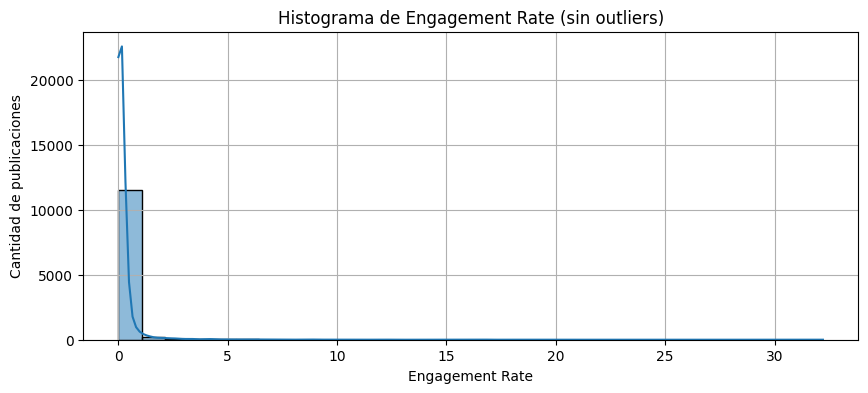

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['engagement_rate'], bins=30, kde=True)
plt.title('Histograma de Engagement Rate (sin outliers)')
plt.xlabel('Engagement Rate')
plt.ylabel('Cantidad de publicaciones')
plt.grid(True)
plt.show()

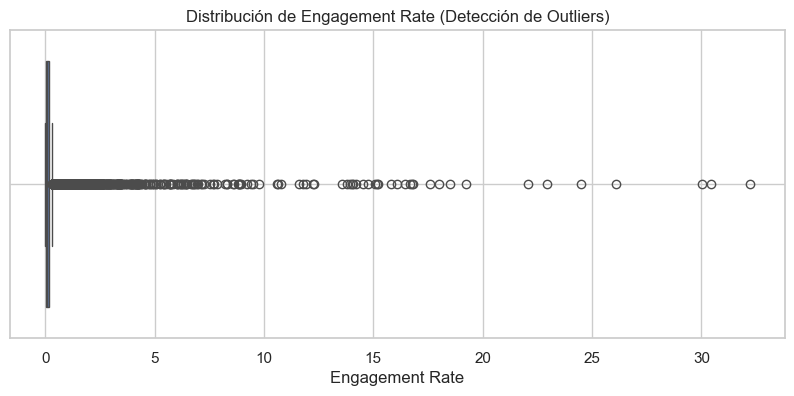

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo visual (opcional)
sns.set(style="whitegrid")

# Crear boxplot para ver outliers en engagement_rate
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['engagement_rate'])
plt.title('Distribución de Engagement Rate (Detección de Outliers)')
plt.xlabel('Engagement Rate')
plt.grid(True)
plt.show()


### Aplicación del método de Tukey (IQR) para calcular límites y eliminar outliers

In [28]:
# Calcular límites de Tukey para detectar outliers
Q1 = df['engagement_rate'].quantile(0.25)
Q3 = df['engagement_rate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Eliminar outliers que están por encima del límite superior
df = df[df['engagement_rate'] <= upper_bound]


### Revalidación estadística post-limpieza

In [29]:
print(df['engagement_rate'].describe())

count    10506.000000
mean         0.092452
std          0.066880
min          0.001880
25%          0.046110
50%          0.071575
75%          0.117735
max          0.332950
Name: engagement_rate, dtype: float64


In [ ]:
# Check DATASET 
# Vista previa
print(df.head())

# Verificar valores nulos
print(df.isnull().sum())

# Tipos de datos
print(df.dtypes)

        post_id           timestamp day_of_week   platform        user_id  \
0  kcqbs6hxybia 2024-12-09 11:26:15      Monday  Instagram  user_52nwb0a6   
1  vkmervg4ioos 2024-07-28 19:59:26      Sunday    Twitter  user_ucryct98   
4  c9dkiomowakt 2024-09-05 21:03:01    Thursday    Twitter  user_l1vpox2k   
6  32qywmjy84gk 2024-08-21 17:02:47   Wednesday  Instagram  user_hpr07vl1   
7  wu063ci6mizp 2025-01-27 16:09:54      Monday     Reddit  user_2es9a4lv   

               location language  \
0  Melbourne, Australia      POR   
1          Tokyo, Japan      RUS   
4       Berlin, Germany      HIN   
6         Madrid, Spain      JPN   
7     São Paulo, Brazil      ESP   

                                        text_content  \
0  Just tried the Chromebook from Google. Best pu...   
1  Just saw an ad for Microsoft Surface Laptop du...   
4  Just tried the Corolla from Toyota. Absolutely...   
6  Not sure why with my new Pepsi Wild Cherry fro...   
7  Just saw an ad for Coca-Cola Coke Zer

### Visualización actualizada con boxplot e histograma sin outliers.

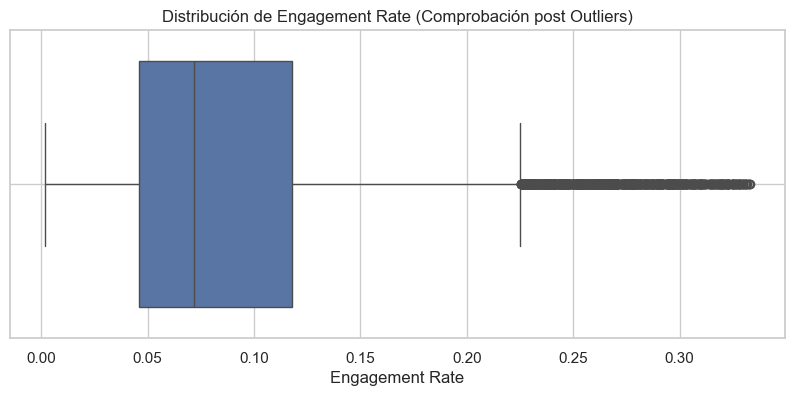

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo visual (opcional)
sns.set(style="whitegrid")

# Crear boxplot para ver outliers en engagement_rate
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['engagement_rate'])
plt.title('Distribución de Engagement Rate (Comprobación post Outliers)')
plt.xlabel('Engagement Rate')
plt.grid(True)
plt.show()


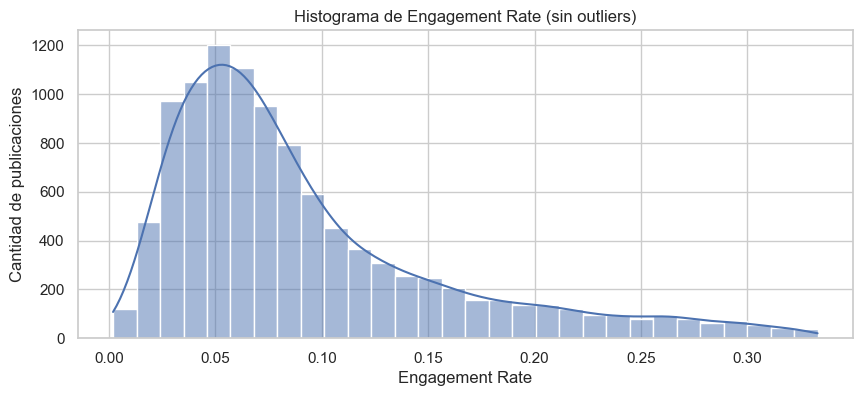

In [32]:
#Verificar columna sin outliers

plt.figure(figsize=(10, 4))
sns.histplot(df['engagement_rate'], bins=30, kde=True)
plt.title('Histograma de Engagement Rate (sin outliers)')
plt.xlabel('Engagement Rate')
plt.ylabel('Cantidad de publicaciones')
plt.grid(True)
plt.show()


In [33]:
print(df.shape)

(10506, 30)


## Verificación de consistencia de métricas
<hr style="border: none; height: 5px; background-color: #006666;">

### Suma de columnas clave

In [34]:
#Sumar columnas relevantes y revisar proporciones

print("Total Likes:", df['likes_count'].sum())
print("Total Shares:", df['shares_count'].sum())
print("Total Comments:", df['comments_count'].sum())
print("Total Impressions:", df['impressions'].sum())


Total Likes: 25438321
Total Shares: 10417474
Total Comments: 5267813
Total Impressions: 587358638


### Cálculo de engagement_rate reconstruido a partir de interacciones sobre impresiones

In [35]:
# Ver ratios entre columnas
df['reconstructed_engagement'] = (df['likes_count'] + df['shares_count'] + df['comments_count']) / df['impressions']
df['engagement_diff'] = df['engagement_rate'] - df['reconstructed_engagement']

# Ver cuántos casos tienen una diferencia notable
print((df['engagement_diff'].abs() > 0.01).sum())


0


In [36]:
df[['likes_count', 'shares_count', 'comments_count', 'impressions']].sort_values(by='impressions', ascending=False).head(10)


,likes_count,shares_count,comments_count,impressions
8182,287,154,340,99997
8936,3902,335,94,99970
9262,2101,523,186,99970
9659,576,1716,153,99964
7080,3300,467,100,99964
6217,3757,9,943,99959
11611,2944,909,128,99957
7422,2980,1966,233,99955
3451,2868,1288,25,99945
1238,853,496,482,99922


### Comprobación y eliminación de la columnas

In [37]:
print(df.columns.tolist())
print("Cantidad de columnas:", len(df.columns))


['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id', 'location', 'language', 'text_content', 'hashtags', 'mentions', 'keywords', 'topic_category', 'sentiment_score', 'sentiment_label', 'emotion_type', 'toxicity_score', 'likes_count', 'shares_count', 'comments_count', 'impressions', 'engagement_rate', 'brand_name', 'product_name', 'campaign_name', 'campaign_phase', 'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate', 'city', 'country', 'reconstructed_engagement', 'engagement_diff']
Cantidad de columnas: 32


In [38]:
# Eliminar columnas que ya no se necesitan
df.drop(columns=['location', 'reconstructed_engagement', 'engagement_diff'], inplace=True)




## Guardado del    **DataSet limpio**
<hr style="border: none; height: 5px; background-color: #006666;">

In [39]:
# Guardar el archivo limpio en formato CSV
df.to_csv('clean_social_media_dataset.csv', index=False)